In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

from skmultilearn.model_selection import iterative_train_test_split

from imblearn.over_sampling import RandomOverSampler

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
n_muestras_a_agregar = 50
X_min=df[df["RNF"]==1]
X_minoritaria=X_min[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', "Tool wear [min]"]] 
y_minoritaria=Y[Y['RNF']==1]
rng = np.random.default_rng(seed=42)
# Realizar sobremuestreo aleatorio
indices_aleatorios = rng.integers(0, len(X_minoritaria), size=n_muestras_a_agregar)
X_minoritaria_sobremuestreada = X_minoritaria.iloc[indices_aleatorios]
y_minoritaria_sobremuestreada =y_minoritaria.iloc[indices_aleatorios]
X_sobremuestreado = pd.concat([X, X_minoritaria_sobremuestreada], ignore_index=True)
y_sobremuestreado = pd.concat([Y, y_minoritaria_sobremuestreada], ignore_index=True)
X=X_sobremuestreado
Y=y_sobremuestreado


In [6]:
#modelo de prediccion
labels = ["TWF", "HDF", "PWF", "OSF", "RNF"]
rf = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42) 
multi_rf = MultiOutputClassifier(rf) 
multi_rf.fit(X_train, Y_train) 
# Evaluacion 
Y_pred = multi_rf.predict(X_test) 
print(classification_report(Y_test, Y_pred, target_names=labels))

              precision    recall  f1-score   support

         TWF       0.00      0.00      0.00        14
         HDF       0.94      0.50      0.65        34
         PWF       0.84      0.55      0.67        29
         OSF       0.94      0.59      0.72        29
         RNF       0.00      0.00      0.00         6

   micro avg       0.91      0.45      0.60       112
   macro avg       0.55      0.33      0.41       112
weighted avg       0.75      0.45      0.56       112
 samples avg       0.02      0.02      0.02       112



d:\Katy\Instalados\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Katy\Instalados\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Katy\Instalados\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Katy\Instalados\lib\site-packages\sklearn\metrics\_

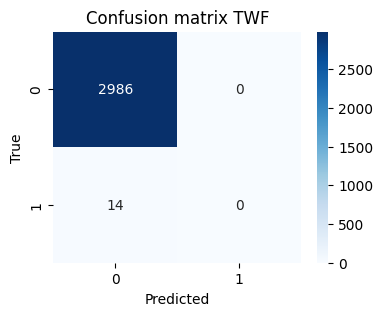

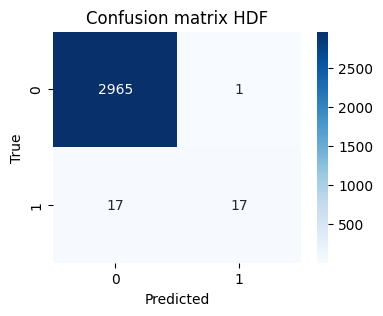

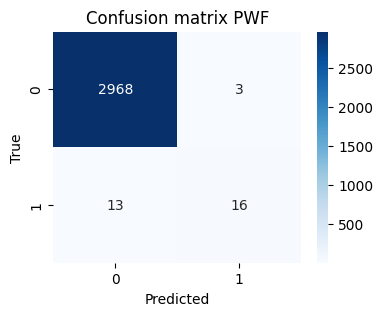

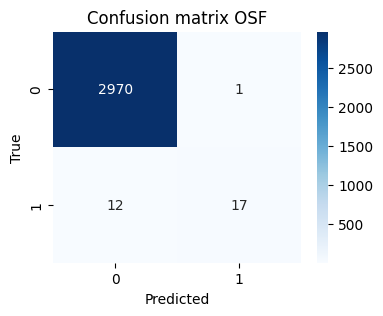

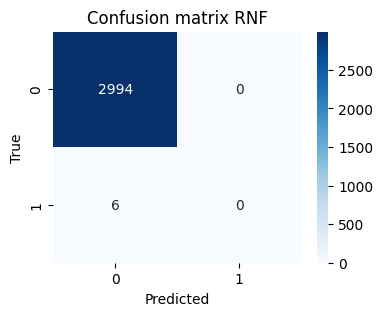

In [7]:
#matrices de confusion por etiquetas
labels=["TWF", "HDF", "PWF", "OSF", "RNF"]
for i, lab in enumerate(labels):
    cm = confusion_matrix(Y_test[:,i], Y_pred[:,i])
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion matrix {lab}")
    plt.xlabel("Predicted"); plt.ylabel("True")
    plt.show()